<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Splint_01_Learning_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions

In [ ]:
app_train = pd.read_csv('/Users/kudokoki/dive-practice/downroad_data_sets/HomeCresit/application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


In [ ]:
# トレインデータの確認
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
# 数値以外の列を確認
app_train_object = app_train.select_dtypes('object').columns.tolist()
print('objectの数:',len(app_train_object))
print(app_train_object)

objectの数: 16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
# 欠損値を確認
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_df = missing_values_table(app_train)

print('欠損値を含む列数:',len(missing_df))
missing_df.head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
欠損値を含む列数: 67


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
#TARGETの相関係数を確認
corr = my_functions.corr_to_one_feature(app_train, 'TARGET')

print(corr.head(5))
print(corr.tail(5))

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
Name: TARGET, dtype: float64
FLOORSMAX_AVG   -0.044003
DAYS_EMPLOYED   -0.044932
EXT_SOURCE_1    -0.155317
EXT_SOURCE_2    -0.160472
EXT_SOURCE_3    -0.178919
Name: TARGET, dtype: float64


In [ ]:
# ターゲット1と相関が高い3つを学習させる
feature = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY']

X = app_train[feature].values
y = app_train['TARGET'].values

In [ ]:
# 訓練データと、検証データに分割（75:25）
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print('X_train.shape:',X_train.shape)
print('X_valid.shpae:',X_valid.shape)
print('y_train.shpae:',y_train.shape)
print('y_valid.shpae:',y_valid.shape)

X_train.shape: (230633, 2)
X_valid.shpae: (76878, 2)
y_train.shpae: (230633,)
y_valid.shpae: (76878,)


In [ ]:
# testデータの読み込み
app_test = pd.read_csv('/Users/kudokoki/dive-practice/downroad_data_sets/HomeCresit/application_test.csv')
print('Training data shape: ', app_test.shape)
app_test.head()

Training data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_test = app_test[feature].values

## カテゴリデータ処理

In [ ]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# カテゴリデータをエンコード
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [ ]:
# one-hot エンコード
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [ ]:
print('after One-Hot')
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

after One-Hot
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [ ]:
corr = my_functions.corr_to_one_feature(app_train, 'TARGET')

# Display correlations
print('Most Positive Correlations:\n', corr.head(5))
print('\nMost Negative Correlations:\n', corr.tail(5))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_INCOME_TYPE_Working       0.057481
Name: TARGET, dtype: float64

Most Negative Correlations:
 CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, dtype: float64


### 欠損値の確認と処理

In [ ]:
# 欠損値を確認
data = app_train

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_train = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_train))
missing_train.head(10)

欠損値を含む列数: 61


,欠損数,欠損率
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
FLOORSMIN_MODE,208642,67.848630


In [ ]:
# 欠損値を確認
data = app_test

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_test = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_test))
missing_test.head(10)

欠損値を含む列数: 58


,欠損数,欠損率
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
FLOORSMIN_AVG,32466,66.605121


1. **欠損地を無視するパターン**

In [ ]:
# trainデータだけにある欠損値を確認
for i in missing_train.index.values:
    if i not in missing_test.index.values:
        print(i)

AMT_GOODS_PRICE
CNT_FAM_MEMBERS
DAYS_LAST_PHONE_CHANGE


In [ ]:
feature = []
for i in app_train:
    if i not in missing_train.index.values:
        if i not in 'TARGET':
            feature.append(i)
print('欠損値のない特徴量の数:',len(feature))

欠損値のない特徴量の数: 178


In [ ]:
# 欠損値を含まない特徴量を抽出

X = app_train[feature].values
y = app_train['TARGET'].values

In [ ]:
# 訓練データと、検証データに分割（75:25）

X_train, X_valid, y_train, y_valid = \
train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print('X_train.shape:',X_train.shape)
print('X_valid.shpae:',X_valid.shape)
print('y_train.shpae:',y_train.shape)
print('y_valid.shpae:',y_valid.shape)

X_train.shape: (230633, 178)
X_valid.shpae: (76878, 178)
y_train.shpae: (230633,)
y_valid.shpae: (76878,)


In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler

# 標準化クラスをインスタンス化
scaler = StandardScaler()

# 配列Xの平均と分散を計算して記憶する
scaler.fit(X_train)

# 標準化
X_train_scd = scaler.transform(X_train)
X_valid_scd = scaler.transform(X_valid)

#表示行数を１０行に設定
np.set_printoptions(threshold=10)

print(X_train_scd)
print(X_valid_scd)

[[-1.22214563  3.08671705  1.39335828 ... -0.13305475  0.96522763
  -0.08786737]
 [ 0.01253087 -0.32396879  1.39335828 ... -0.13305475  0.96522763
  -0.08786737]
 [-0.07199509 -0.32396879 -0.7176905  ... -0.13305475 -1.03602505
  -0.08786737]
 ...
 [-0.01801564  3.08671705 -0.7176905  ... -0.13305475  0.96522763
  -0.08786737]
 [-0.40501919 -0.32396879  1.39335828 ... -0.13305475 -1.03602505
  -0.08786737]
 [ 1.71076695 -0.32396879 -0.7176905  ... -0.13305475  0.96522763
  -0.08786737]]
[[-1.25198175 -0.32396879 -0.7176905  ... -0.13305475 -1.03602505
  -0.08786737]
 [ 0.82612484 -0.32396879 -0.7176905  ... -0.13305475  0.96522763
  -0.08786737]
 [ 1.53374511  3.08671705  1.39335828 ... -0.13305475  0.96522763
  -0.08786737]
 ...
 [ 0.63156722 -0.32396879 -0.7176905  ... -0.13305475  0.96522763
  -0.08786737]
 [-1.64620592 -0.32396879 -0.7176905  ... -0.13305475  0.96522763
  -0.08786737]
 [ 0.13714    -0.32396879  1.39335828 ... -0.13305475  0.96522763
  -0.08786737]]


In [ ]:
print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 240)


2. **欠損値を0埋めするパターン**

In [ ]:
app_train_fill_zero = app_train.copy()

In [ ]:
missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_train = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_train))
missing_train.head(10)

欠損値を含む列数: 58


,欠損数,欠損率
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
FLOORSMIN_AVG,32466,66.605121


In [ ]:
# NaNを0で埋める
app_train_fill_zero = app_train_fill_zero.fillna(0)

In [ ]:
data = app_train_fill_zero

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_train = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_train))

欠損値を含む列数: 0


In [ ]:
feature = []
for i in app_train:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 239


In [ ]:
# train,validデータの作成
X = app_train_fill_zero[feature].values
y = app_train_fill_zero['TARGET'].values

X_train, X_valid, y_train, y_valid = \
train_test_split(X, y, test_size=0.25, random_state=0)

print('X_train.shape:',X_train.shape)
print('X_valid.shpae:',X_valid.shape)
print('y_train.shpae:',y_train.shape)
print('y_valid.shpae:',y_valid.shape)

X_train.shape: (230633, 239)
X_valid.shpae: (76878, 239)
y_train.shpae: (230633,)
y_valid.shpae: (76878,)


3.**欠損値を平均値で埋めるパターン**

In [ ]:
app_train_fill_mean = app_train.copy()

In [ ]:
mean = app_train_fill_mean.mean()

app_train_fill_mean = app_train_fill_mean.fillna(mean)

In [ ]:
data = app_train_fill_mean

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_train = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_train))

欠損値を含む列数: 0


In [ ]:
feature = []
for i in app_train:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 239


In [ ]:
# train,validデータの作成
X = app_train_fill_mean[feature].values
y = app_train_fill_mean['TARGET'].values

X_train, X_valid, y_train, y_valid = \
train_test_split(X, y, test_size=0.25, random_state=0)

print('X_train.shape:',X_train.shape)
print('X_valid.shpae:',X_valid.shape)
print('y_train.shpae:',y_train.shape)
print('y_valid.shpae:',y_valid.shape)

X_train.shape: (230633, 239)
X_valid.shpae: (76878, 239)
y_train.shpae: (230633,)
y_valid.shpae: (76878,)


4. **'DAYS_BIRTH'の値がおかしいので確認**

In [ ]:
app_train_fill_mean['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
# 正しい年齢に変換
app_train_fill_mean['DAYS_BIRTH'] = (app_train_fill_mean['DAYS_BIRTH']/-365) # 申請日から遡った日数なので-1を掛ける
app_train_fill_mean['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

5. **'DAYS_EMPLOYED'(被雇用日数)に異常値があるので対応**

In [ ]:
app_train_fill_mean['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

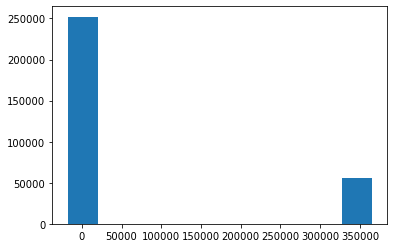

In [ ]:
plt.hist(app_train_fill_mean['DAYS_EMPLOYED']);

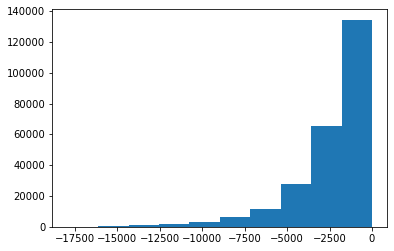

In [ ]:
# 異常値をNanで置き換えて、ヒストグラムを可視化
app_train_fill_mean['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(app_train_fill_mean['DAYS_EMPLOYED']);

In [ ]:
#NaNで置き換えたところを、平均値で埋める
mean = app_train_fill_mean.mean()

app_train_fill_mean = app_train_fill_mean.fillna(mean)

In [ ]:
data = app_train_fill_mean

missing = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)
missing_train = pd.DataFrame({'欠損数':missing,
                           '欠損率':missing/len(data)*100})

print('欠損値を含む列数:',len(missing_train))

欠損値を含む列数: 0


In [ ]:
feature = []
for i in app_train:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:', len(feature))

特徴量数: 239


## Notebookを参考にして、新たな特徴量を作成

In [ ]:
# 収入に対するクレジット金額の割合
app_train_fill_mean['CREDIT_INCOME_PERCENT'] = \
app_train_fill_mean['AMT_CREDIT'] / app_train_fill_mean['AMT_INCOME_TOTAL']

# 収入に対する年金の割合
app_train_fill_mean['ANNUITY_INCOME_PERCENT'] = \
app_train_fill_mean['AMT_ANNUITY'] / app_train_fill_mean['AMT_INCOME_TOTAL']

# クレジット金額対する年金の割合
app_train_fill_mean['CREDIT_TERM'] = \
app_train_fill_mean['AMT_ANNUITY'] / app_train_fill_mean['AMT_CREDIT']

# 年齢に対する雇用日数の割合
app_train_fill_mean['DAYS_EMPLOYED_PERCENT'] = \
app_train_fill_mean['DAYS_EMPLOYED'] / app_train_fill_mean['DAYS_BIRTH']

In [ ]:
print('Training Features shape: ', app_train_fill_mean.shape)

Training Features shape:  (307511, 244)


In [ ]:
feature = []
for i in app_train_fill_mean:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 243


## testデータにも同じ処理を施す

In [ ]:
app_test_fill_mean = app_test.copy()

In [ ]:
# 年単位に変換
app_test_fill_mean['DAYS_BIRTH'] = (app_test_fill_mean['DAYS_BIRTH']/-365)
app_test_fill_mean['DAYS_BIRTH'].describe()

count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64

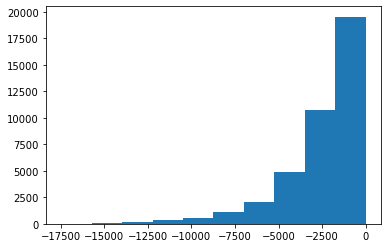

In [ ]:
app_test_fill_mean['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(app_test_fill_mean['DAYS_EMPLOYED']);

In [ ]:
# テストデータをトレインデータの平均で埋める
mean = app_test_fill_mean.mean()
app_test_fill_mean = app_test_fill_mean.fillna(mean)

In [ ]:
# テストデータにも、トレインデータと同様に特徴量を作成する
app_test_fill_mean['CREDIT_INCOME_PERCENT'] = \
app_test_fill_mean['AMT_CREDIT'] / app_test_fill_mean['AMT_INCOME_TOTAL']

app_test_fill_mean['ANNUITY_INCOME_PERCENT'] = \
app_test_fill_mean['AMT_ANNUITY'] / app_test_fill_mean['AMT_INCOME_TOTAL']

app_test_fill_mean['CREDIT_TERM'] = \
app_test_fill_mean['AMT_ANNUITY'] / app_test_fill_mean['AMT_CREDIT']

app_test_fill_mean['DAYS_EMPLOYED_PERCENT'] = \
app_test_fill_mean['DAYS_EMPLOYED'] / app_test_fill_mean['DAYS_BIRTH']

In [ ]:
print('Training Features shape: ', app_test_fill_mean.shape)

Training Features shape:  (48744, 243)


In [ ]:
# 特徴量の選択（TARGET以外使用）
feature = []
for i in app_train_fill_mean:
    if i not in 'TARGET':
        feature.append(i)
print('特徴量数:',len(feature))

特徴量数: 243


## 学習、推定、評価

In [ ]:
from sklearn.model_selection import train_test_split

X = app_train_fill_mean[feature].values
y = app_train_fill_mean['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X_train.shape:',X_train.shape)
print('X_valid.shpae:',X_valid.shape)
print('y_train.shpae:',y_train.shape)
print('y_valid.shpae:',y_valid.shape)

X_train.shape: (230633, 243)
X_valid.shpae: (76878, 239)
y_train.shpae: (230633,)
y_valid.shpae: (76878,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 標準化クラスをインスタンス化
scaler = StandardScaler()

# 配列Xの平均と分散を計算して記憶する
scaler.fit(X_train)

# 標準化
X_train_scd = scaler.transform(X_train)
X_test_scd = scaler.transform(X_test)

#表示行数を１０行に設定
np.set_printoptions(threshold=10)

print(X_train_scd)
print(X_test_scd)

[[-1.22214563  3.08671705  1.39335828 ... -1.30974201 -0.16386951
   0.49927008]
 [ 0.01253087 -0.32396879  1.39335828 ...  0.20852589  0.09595042
   0.16416715]
 [-0.07199509 -0.32396879 -0.7176905  ... -0.5657998   2.17040682
   0.27451683]
 ...
 [-0.01801564  3.08671705 -0.7176905  ... -0.64573246 -0.16386951
   0.11885863]
 [-0.40501919 -0.32396879  1.39335828 ... -0.99245947  1.44616174
  -0.39633289]
 [ 1.71076695 -0.32396879 -0.7176905  ...  1.10433514 -0.50768784
   0.05557196]]
[[-1.25198175 -0.32396879 -0.7176905  ... -0.09032098 -0.23427707
   0.41646318]
 [ 0.82612484 -0.32396879 -0.7176905  ... -1.17952068 -0.21549879
   0.30610612]
 [ 1.53374511  3.08671705  1.39335828 ... -0.85700823 -0.16386951
  -0.66627359]
 ...
 [ 0.63156722 -0.32396879 -0.7176905  ...  1.2456082   0.72048749
   0.27087669]
 [-1.64620592 -0.32396879 -0.7176905  ...  0.4338867  -0.94605272
   0.73548527]
 [ 0.13714    -0.32396879  1.39335828 ...  0.24917132 -1.11366101
   1.00544835]]


In [ ]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train_scd, y_train)

y_pred = clf.predict_proba(X_test_scd)[:,1]


# FPR,TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('ランダムフォレスト学習　AUC : ',roc_auc_score(y_test, y_pred))

ランダムフォレスト学習　AUC :  0.7050051164219637


In [ ]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

clf = LogisticRegression(random_state=0)

clf.fit(X_train_scd, y_train)

y_pred = clf.predict_proba(X_test_scd)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('ロジスティック回帰学習　AUC : ', roc_auc_score(y_test, y_pred))

ロジスティック回帰学習　AUC :  0.7508375944438744


### **問題1　クロスバリデーション**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# train,validデータの作成
X = app_train_fill_mean[feature].values
y = app_train_fill_mean['TARGET'].values

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X, y):
    print("train_index:", train_index, "test_index:", test_index)

train_index: [ 61503  61504  61505 ... 307508 307509 307510] test_index: [    0     1     2 ... 61500 61501 61502]
train_index: [     0      1      2 ... 307508 307509 307510] test_index: [ 61503  61504  61505 ... 123002 123003 123004]
train_index: [     0      1      2 ... 307508 307509 307510] test_index: [123005 123006 123007 ... 184504 184505 184506]
train_index: [     0      1      2 ... 307508 307509 307510] test_index: [184507 184508 184509 ... 246006 246007 246008]
train_index: [     0      1      2 ... 246006 246007 246008] test_index: [246009 246010 246011 ... 307508 307509 307510]


In [ ]:
# 指標値格納リスト
randomf = []
logistic = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    # 標準化クラスをインスタンス化
    scaler = StandardScaler()

    # 配列Xの平均と分散を計算して記憶する
    scaler.fit(X[train_index])

    # 標準化
    X_train_scd = scaler.transform(X[train_index])
    X_test_scd = scaler.transform(X[test_index])

    # ランダムフォレスト
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train_scd, y[train_index])
    y_pred = clf.predict_proba(X_test_scd)[:,1]

    # FPR,TPR
    fpr, tpr, thresholds = roc_curve(y[test_index], y_pred)
    score = roc_auc_score(y[test_index], y_pred)
    randomf.append(score)

In [ ]:
randomf = np.array(randomf)

print('ランダムフォレスト\n分割数 : {}\n平均AUC面積 : {}'.format(len(randomf), randomf.mean()))

ランダムフォレスト
分割数 : 5
平均AUC面積 : 0.7018039043113335


In [ ]:
# ロジスティック回帰
for train_index, test_index in kf.split(X, y):
    # 標準化クラスをインスタンス化
    scaler = StandardScaler()

    # 配列Xの平均と分散を計算して記憶する
    scaler.fit(X[train_index])

    # 標準化
    X_train_scd = scaler.transform(X[train_index])
    X_test_scd = scaler.transform(X[test_index])

    # ロジスティック回帰
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train_scd, y[train_index])
    y_pred = clf.predict_proba(X_test_scd)[:,1]

    # FPR,TPR
    fpr, tpr, thresholds = roc_curve(y[test_index], y_pred)
    score = roc_auc_score(y[test_index], y_pred)
    logistic.append(score)

In [ ]:
logistic = np.array(logistic)

print('ロジスティック回帰\n分割数 : {}\n平均AUC面積 : {}'.format(len(logistic), logistic.mean()))

ロジスティック回帰
分割数 : 5
平均AUC面積 : 0.7481410678236979


### **問題2　グリッドサーチ**

In [ ]:
### 探索するパラメータ
def param():
    ret = {
        'C': [0.01, 0.1, 1],
        'penalty': ['l1', 'l2'],
    }
    return ret

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.25,
                                                      random_state=0)

# 標準化クラスをインスタンス化
scaler = StandardScaler()

# 配列Xの平均と分散を計算して記憶する
scaler.fit(X_train)

# 標準化
X_train_scd = scaler.transform(X_train)
X_valid_scd = scaler.transform(X_valid)

clf = LogisticRegression(random_state=0)

gscv = GridSearchCV(clf, param(), cv=5, verbose=0, scoring='roc_auc')
gscv.fit(X_train_scd, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
gs_result.T

,0,1,2,3,4,5
mean_fit_time,0.319535,5.47742,0.272163,6.41001,0.432517,6.48651
std_fit_time,0.229267,1.23359,0.0690436,0.659581,0.249479,0.625617
mean_score_time,0,0.0400508,0,0.0318292,0,0.0386958
std_score_time,0,0.00945525,0,0.00225454,0,0.0114205
param_C,0.01,0.01,0.1,0.1,1,1
param_penalty,l1,l2,l1,l2,l1,l2
params,"{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 1, 'penalty': 'l2'}"
split0_test_score,NaN,0.750471,NaN,0.750607,NaN,0.750564
split1_test_score,NaN,0.748251,NaN,0.748201,NaN,0.748043
split2_test_score,NaN,0.735683,NaN,0.735755,NaN,0.735662


In [ ]:
display(gscv.best_params_)

# 精度が一番高いモデルをbestに格納
best = gscv.best_estimator_

display(X_valid.shape)
# 
pred = best.predict_proba(X_valid_scd)



{'C': 0.01, 'penalty': 'l2'}

(76878, 243)

In [ ]:
from sklearn.metrics import confusion_matrix

print('学習モデル: ロジスティック回帰')
print('探索パラメータ：', param())
print('分割数: ', 5)
print('ベストパラメータ: ', gscv.best_params_)
print('平均精度: ', gscv.best_score_)
print('混合行列\n', confusion_matrix(y_valid, best.predict(X_valid_scd)))

学習モデル: ロジスティック回帰
探索パラメータ： {'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']}
分割数:  5
ベストパラメータ:  {'C': 0.01, 'penalty': 'l2'}
平均精度:  0.746739847383936
混合行列
 [[70715    72]
 [ 6022    69]]


FP(返済不能の人を返済可と判断した個数)が6022個。
多いやんけ。

## 問題3　Notebookを参考にパラメータの探索の手法を調べる

[Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)

Gradient Boosting Machineというモデルがあり、現在Kaggleでのほとんどの競技会で最高のパフォーマンスを発揮する方法らしい。また、学習モデルはほとんどの場合、決定木を採用されるとのこと。

参考にしたNotebookはLightGBMライブラリのGradientBoostingMachineを使用している。とりあえず写経してみる。

1. **動作確認のため、trainデータのサンプル数を16000個まで削減。trainを10000、testを6000に分割**

In [ ]:
#import pandas as pd
import numpy as np

# Modeling
import lightgbm

# Splitting data
from sklearn.model_selection import train_test_split

N_FOLDS = 5
MAX_EVALS = 5

In [ ]:
features = pd.read_csv('/Users/kudokoki/dive-practice/downroad_data_sets/HomeCresit/application_train.csv')

# DataFrame.sample()　サンプルデータを抽出
features = features.sample(n = 16000, random_state = 42)

# Only numeric features
features = features.select_dtypes('number') # 数値データのみ

# Extract the labels
labels = np.array(features['TARGET'].astype(np.int32)).reshape((-1, ))
features = features.drop(columns = ['TARGET', 'SK_ID_CURR'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 6000, random_state = 50)

In [ ]:
print("Training features shape: ", train_features.shape)
print("Testing features shape: ", test_features.shape)

Training features shape:  (10000, 104)
Testing features shape:  (6000, 104)


### 早期打ち切り
勾配ブースティングマシンで最も重要なハイパーパラメータの1つは、推定量の数（順次トレーニングされる決定木の数）です。これを検索の別のハイパーパラメータとして設定することもできますが、より良い方法があります。早期停止です。早期停止とは、指定された反復回数で検証エラーが減少しなくなるまでトレーニングすることを意味します。 GBMの場合、これはより多くの決定木をトレーニングすることを意味します。この例では、100ラウンドで早期停止を使用します。つまり、検証エラーが100ラウンド減少しなくなるまでトレーニングが続行されます。次に、検証データで最高のスコアが得られた推定量の数が、最終モデルで使用する推定量の数として選択されます。

早期停止は、相互検証機能のLightGBMライブラリを使用して簡単に実装できます。

In [ ]:
# Create a training and testing dataset

# lightgbmのデータセット
train_set = lightgbm.Dataset(data = train_features, label = train_labels)
test_set = lightgbm.Dataset(data = test_features, label = test_labels)

In [ ]:
# Get default hyperparameters
model = lightgbm.LGBMClassifier(randum_state=0)
default_params = model.get_params()
# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'randum_state': 0}

メインとなるパラメータを確認する。
[参考ブログ](https://www.codexa.net/lightgbm-beginner/)
* num_leaves<br>
LightGBMで最も重要と言っても過言ではないのがnum_leaves(葉の数)です。num_leavesは決定木の複雑度を調整します。num_leavesの値が高すぎると過学習となり、低すぎると未学習になります。num_leavesを調整する場合はmax_depth（決定木の深さ）のパラメータと一緒に調整すると良いです。


* min_data_in_leaf <br>
Leaf-wiseを採用しているLightGBMではmin_data_in_leafはとても重要なハイパーパラメータです。min_data_in_leafは決定木のノード（葉）の最小データ数を指定します。値が高いと決定木が深く育つのを抑えるため過学習防ぎますが、逆に未学習となる場合もあります。min_data_in_leafは訓練データのレコード数とnum_leavesに大きく影響されます。


* max_depth<br> 
決定木の深さを指定するハイパーパラメータです。単体で調整するよりも、他のハイパーパラメータとのバランスを考えながら調整します。


パラメータチューニングのコツがブログに記載してるので確認すること。

In [ ]:
# Cross validation with early stopping
cv_results = lightgbm.cv(default_params,
                    train_set,
                    num_boost_round=10000,
                    early_stopping_rounds=100,
                    metrics='auc',
                    nfold=N_FOLDS,
                    seed=42)

In [ ]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['auc-mean'])))

The maximum validation ROC AUC was: 0.70058 with a standard deviation of 0.02819.
The optimal number of boosting rounds (estimators) was 23.


In [ ]:
from sklearn.metrics import roc_auc_score

# Optimal number of esimators found in cv
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.72832 ROC AUC on the test set.


よくわからないので、写経を中断し、自作のデータをぶっ込んでみる。

### **問題4　高い汎用性モデルの作成**

In [ ]:
train_data = lightgbm.Dataset(X_train_scd, label=y_train)
valid_data = lightgbm.Dataset(X_valid_scd, label=y_valid, reference=train_data)

In [ ]:
# Get default hyperparameters
lgbm = lightgbm.LGBMClassifier(randum_state=0)
default_params = lgbm.get_params()
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'randum_state': 0}

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 2,
    'verbose': 0,
}

In [ ]:
gbm = lightgbm.train(params,
                train_data,
                valid_sets=valid_data,
                num_boost_round=100,
                verbose_eval=5)

[5]	valid_0's multi_logloss: 0.260527
[10]	valid_0's multi_logloss: 0.254078
[15]	valid_0's multi_logloss: 0.250531
[20]	valid_0's multi_logloss: 0.248154
[25]	valid_0's multi_logloss: 0.246485
[30]	valid_0's multi_logloss: 0.245125
[35]	valid_0's multi_logloss: 0.244142
[40]	valid_0's multi_logloss: 0.243578
[45]	valid_0's multi_logloss: 0.24305
[50]	valid_0's multi_logloss: 0.242653
[55]	valid_0's multi_logloss: 0.242333
[60]	valid_0's multi_logloss: 0.241993
[65]	valid_0's multi_logloss: 0.241919
[70]	valid_0's multi_logloss: 0.241891
[75]	valid_0's multi_logloss: 0.241811
[80]	valid_0's multi_logloss: 0.241696
[85]	valid_0's multi_logloss: 0.241655
[90]	valid_0's multi_logloss: 0.241613
[95]	valid_0's multi_logloss: 0.241614
[100]	valid_0's multi_logloss: 0.241547


とりあえず動いた。ブログ曰く、logloss(損失関数の値？)が下がり続けてるのはまだ改善の余地がある、と言う解釈らしい。

In [ ]:
# 検証データを使い推定結果を算出
gbm_preds = gbm.predict(X_valid_scd)

In [ ]:
gbm_preds

array([[0.70181114, 0.29818886],
       [0.97093144, 0.02906856],
       [0.92902834, 0.07097166],
       ...,
       [0.98087949, 0.01912051],
       [0.71452948, 0.28547052],
       [0.94961969, 0.05038031]])

In [ ]:
y_pred = []
 
for x in gbm_preds:
    y_pred.append(np.argmax(x))
    
print(y_pred[:10], '\n', y_pred[-10:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print('lightgbm.LGBMClassifierを使った時の混合行列\n', confusion_matrix(y_valid, y_pred))

print('GridSearchCVを使った時の混合行列\n', confusion_matrix(y_valid, best.predict(X_valid_scd)))

lightgbm.LGBMClassifierを使った時の混合行列
 [[70671   116]
 [ 5974   117]]
GridSearchCVを使った時の混合行列
 [[70715    72]
 [ 6022    69]]


FP(左下)は若干少なくなり、TN(右下)が増えてくれた。が、FN(右上)が増えてしまった。

参考ブログにこんなことが書いてあった。
---
推測精度を向上させたいときにいじるパラメータ
* 大きいmax_bin（初期値255）を使う
* 小さいlearning_rate(初期値0.1)と大きいnum_iterations(初期値100)を使う
* 大きいnum_leaves（初期値31）を使う
* 訓練データのレコード数を増やす（可能であれば）

In [ ]:
# max_binを追加してみる
params2 = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 2,
    'verbose': 0,
    'max_bin': 255,
}

In [ ]:
gbm = lightgbm.train(params,
                train_data,
                valid_sets=valid_data,
                num_boost_round=100,
                verbose_eval=5)

[5]	valid_0's multi_logloss: 0.260527
[10]	valid_0's multi_logloss: 0.254078
[15]	valid_0's multi_logloss: 0.250531
[20]	valid_0's multi_logloss: 0.248154
[25]	valid_0's multi_logloss: 0.246485
[30]	valid_0's multi_logloss: 0.245125
[35]	valid_0's multi_logloss: 0.244142
[40]	valid_0's multi_logloss: 0.243578
[45]	valid_0's multi_logloss: 0.24305
[50]	valid_0's multi_logloss: 0.242653
[55]	valid_0's multi_logloss: 0.242333
[60]	valid_0's multi_logloss: 0.241993
[65]	valid_0's multi_logloss: 0.241919
[70]	valid_0's multi_logloss: 0.241891
[75]	valid_0's multi_logloss: 0.241811
[80]	valid_0's multi_logloss: 0.241696
[85]	valid_0's multi_logloss: 0.241655
[90]	valid_0's multi_logloss: 0.241613
[95]	valid_0's multi_logloss: 0.241614
[100]	valid_0's multi_logloss: 0.241547


まだloglossが下がる傾向がある。もっとパラメータをいじってみる。

In [ ]:
# num_leaves(決定木の数？)をデフォの倍の62に指定
params3 = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 2,
    'verbose': 0,
    'max_bin': 255,
    'num_leaves': 62
}

In [ ]:
gbm = lightgbm.train(params,
                train_data,
                valid_sets=valid_data,
                num_boost_round=200, # 200回に変更
                verbose_eval=10) # ログを10回ごとに変更

[10]	valid_0's multi_logloss: 0.254078
[20]	valid_0's multi_logloss: 0.248154
[30]	valid_0's multi_logloss: 0.245125
[40]	valid_0's multi_logloss: 0.243578
[50]	valid_0's multi_logloss: 0.242653
[60]	valid_0's multi_logloss: 0.241993
[70]	valid_0's multi_logloss: 0.241891
[80]	valid_0's multi_logloss: 0.241696
[90]	valid_0's multi_logloss: 0.241613
[100]	valid_0's multi_logloss: 0.241547
[110]	valid_0's multi_logloss: 0.241504
[120]	valid_0's multi_logloss: 0.241513
[130]	valid_0's multi_logloss: 0.241459
[140]	valid_0's multi_logloss: 0.241454
[150]	valid_0's multi_logloss: 0.24145
[160]	valid_0's multi_logloss: 0.24141
[170]	valid_0's multi_logloss: 0.241377
[180]	valid_0's multi_logloss: 0.241304
[190]	valid_0's multi_logloss: 0.241281
[200]	valid_0's multi_logloss: 0.241371


何度かloglossが上昇したのが見受けられる。これで推定してみる。

In [ ]:
# 検証データを使い推定結果を算出
gbm_preds = gbm.predict(X_valid_scd)[:,1]
# FPR,TPR
fpr, tpr, thresholds = roc_curve(y_valid, gbm_preds)
score = roc_auc_score(y_valid, gbm_preds)
score

0.7655189398784545

グリッドサーチを使用した時のロジスティック回帰の平均精度が約0.746なので、0.02ほど精度が上がった。

In [ ]:
y_pred = []
for x in gbm_preds:
    y_pred.append(np.argmax(x))
print(confusion_matrix(y_valid, y_pred))

[[70787     0]
 [ 6091     0]]


なぜかまたNが0に戻った。
制御するパラメータを増やして損失関数を下げたつもりだったが、肝心の混合行列はあまり良い変化はなかった。

## trainデータで訓練・検証を分けてたが、trainを全て訓練データにし、testをテストデータで評価するらしいので、学習し直してみる。

In [ ]:
new_train = app_train_fill_mean.drop(columns=['SK_ID_CURR', 'TARGET']).values
new_vaild = app_train_fill_mean['TARGET'].values
new_y = app_test_fill_mean.drop(columns=['SK_ID_CURR'])

In [ ]:
scaler = StandardScaler()

new_train_scd = scaler.fit_transform(new_train)

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,random_state = 0)
clf.fit(new_train, new_vaild)
y_pred = clf.predict_proba(new_y)[:,1]

In [ ]:
# Submission dataframe
submit = pd.DataFrame(app_test_fill_mean['SK_ID_CURR'])
submit['TARGET'] = y_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.034316
1,100005,0.102102
2,100013,0.026616
3,100028,0.037114
4,100038,0.150262


### **問題5　kaggleに提出**

In [ ]:
# Save the submission dataframe
submit.to_csv('/Users/kudokoki/submit_an_assignment/Sprint/submission.csv',
              index = False)

### 感想
授業についていけない気がする。もっと基礎からやり直したいが、毎日の課題で時間を作るのが難しいと感じる。今後続けていくか検討する必要があると思った1日だった。